In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud
import re
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

In [191]:
def conv(content):
    if(content != content):
        return np.NaN
    
    return str(content)
    

In [192]:
d = {'Spam':conv, 'Body':conv, 'Subject':conv, 'From':conv, 'To':conv, 'X-UIDL':conv, 'Message-Id':conv, 'Sender':conv}

In [193]:
mails = pd.read_excel('df_final.xlsx', sheet_name='Sheet1', index_col=None, converters=d, nrows=250 )

In [194]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [195]:
def transformBody(body):
    # removing punctuation
    body = body.replace("'", "")
    body = re.sub(r"[^\w\s]|_", " ", body)
    body = re.sub("[\s+]", " ", body)

    # to lower case
    bodylower = body.lower()
    
    # tokenize, stem and remove stop words
    bodylist = word_tokenize(bodylower)
    stemmer = PorterStemmer()
    stemmedlist = [stemmer.stem(word) for word in bodylist]
    sw = stopwords.words('english')
    finalist = [word for word in stemmedlist if(word not in sw)]
    return finalist

In [196]:
spamBodies = mails[mails['Spam'] == 'Spam'][['Body','Spam']]

In [197]:
spamBodies['whereHTML'] = spamBodies['Body'].apply(lambda x: x[x.find('style')-30:] if(x.find('style') != -1) else np.NaN)

In [198]:
#spamBodies[spamBodies['whereHTML'].notna()]['whereHTML']

In [199]:
#spamBodies.iloc[1]['Body'].find('html')

In [200]:
spamBodies2 = spamBodies.map(transformBody)

In [201]:
spam_words = ' '.join(np.concatenate(spamBodies2.values.tolist()).tolist())

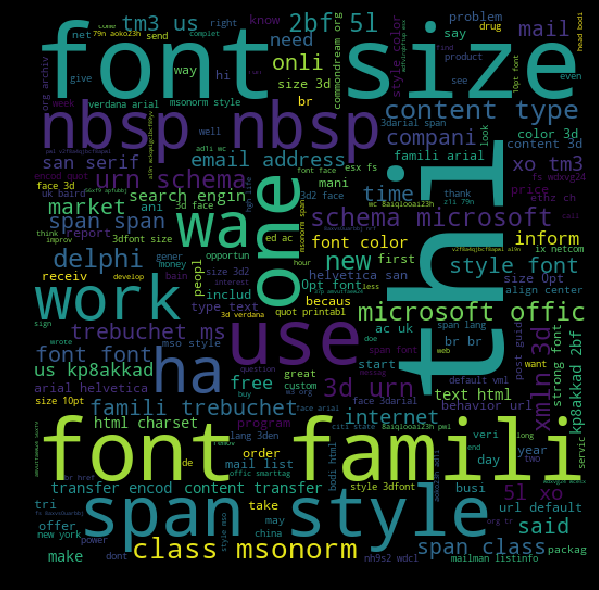

In [202]:
spam_wc = wordcloud.WordCloud(width=512, height=512).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [145]:
print(mails.iloc[41]['Body'])


<!doctype html public "-//w3c//dtd html 4.0 transitional//en">


--------------ms020104060504090609080804--

--------------ms000100070006070505090600
content-type: image/jpeg;
	name="p.jpg"
content-transfer-encoding: base64
content-id: <000301c634d3$5e87f4f0$aa0fa8c0@sanya>

/9j/4aaqskzjrgabaqeayabgaad/2wbdaaggbgcgbqghbwcjcqgkdbqndasldbksew8uhrofhh0a
hbwgjc4nicisixwckdcpldaxndq0hyc5ptgypc4zndl/2wbdaqkjcqwldbgndrgyirwhmjiymjiy
mjiymjiymjiymjiymjiymjiymjiymjiymjiymjiymjiymjiymjiymjiymjl/waarcad2absdasia
ahebaxeb/8qahwaaaqubaqebaqeaaaaaaaaaaaecawqfbgcicqol/8qatraaagedawieawufbaqa
aaf9aqidaaqrbrihmuege1fhbyjxfdkbkaeii0kxwrvs0fakm2jyggkkfhcygroljicokso0nty3
odk6q0rfrkdisuptvfvwv1hzwmnkzwznaglqc3r1dnd4exqdhiwgh4ijipktljwwl5izmqkjpkwm
p6ipqrkztlw2t7i5usldxmxgx8jjytlt1nxw19jz2uhi4+tl5ufo6erx8vp09fb3+pn6/8qahwea
awebaqebaqebaqaaaaaaaaecawqfbgcicqol/8qatreaagecbaqdbacfbaqaaqj3aaecaxeebsex
bhjbuqdhcrmimoeifekrobhbcsmzuvavynlrchyknoel8rcygromjygpkju2nzg5okneruzhselk
u1rvvldywvpjzgvmz2hpann0dxz3eh

In [216]:
mails = pd.read_excel('df_final.xlsx', sheet_name='Sheet1', index_col=None, converters=d )
df_final = mails

In [217]:
# Feature1 -> From same as To. If yes -> 1, else 0
df_final['Feature1'] = 0
df_final.loc[df_final['From'] == df_final['To'], 'Feature1'] = 1
df_final['Feature1'].describe()

count    1039.000000
mean        0.007700
std         0.087452
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Feature1, dtype: float64

In [218]:
import re
def isValidEmailFormat(emails):
    for email in str(emails).split(','):
        if(email.isspace() or len(email) == 0):
            continue
            
        email = re.sub(r'(\n+)', r' ', str(email)).strip()
        print(email)
        
        if(re.match(r"(.+)<(.+)>|<(.+)>", email)):
            email = email[email.find("<")+1:-1]
            print(0, email)
            
        if(len(email) > 7):
            if(re.match("^.+@([?)[a-zA-Z0-9-.]+.([a-zA-Z]{2,3}|[0-9]{1,3})(]?))$", email) != None):
                print('continue')
                continue
            else:
                print('1')
                return 1
        else:
            return 1
        
    return 0

In [219]:
# Feature2 -> is the To column na or invalid ? 1->invalid, 0->valid
df_final['Feature2'] = 0
df_final['Feature2'] = df_final['To'].map(isValidEmailFormat)
df_final.loc[df_final['To'].isna(),'Feature2'] = 1
df_final[df_final['Feature2'] == 1][['Feature2','To']]

<bagpipes@acadia.net>
0 bagpipes@acadia.net
continue
members@your.net
continue
<badams@eastky.com>
0 badams@eastky.com
continue
nan
carlovers@america.com
continue
bait@mikhail.qcc.sk.ca
continue
<badmin@forum-de-beyrouth.com.lb>
0 badmin@forum-de-beyrouth.com.lb
continue
UDog244@aol.com
continue
baileyl@cream.cambridge.scr.slb.com
continue
baileyl@delphi.com
continue
baileyl@erols.com
continue
user@aol.com
continue
bguenter@gemprint.com
continue
buratuss_ef@bigfoot.com
continue
guluimai67@msn.com
continue
<vworlds@vworlds.com>
0 vworlds@vworlds.com
continue
p40508@presence4u.com
continue
bruceg@qcc.sk.ca
continue
usr999@aol.com
continue
BeSeen@At.Our.Site.com
continue
bguenter@gemprint.com
continue
bruce.guenter@gemprint.com
continue
bguenter@linus.vsource.com
continue
Admin@WWW.QCC.SK.CA
continue
AmazingSecrets@WorldInner.Circle
continue
linux-kernel@vger.rutgers.edu
continue
wedeliver@hotmail.com
continue
Shelley7247@juno.com
continue
bmail@bmail.com
continue
healthNprosper@aol.com
c

"Warwick" <warwick@speedy.uwaterloo.ca>
0 warwick@speedy.uwaterloo.ca
continue
the00@plg.uwaterloo.ca
continue
samba-technical@samba.org
continue
<producttestpanel@speedy.uwaterloo.ca>
0 producttestpanel@speedy.uwaterloo.ca
continue
producttestpanel@speedy.uwaterloo.ca
continue
<mhln@mhlearningnetwork.com>
0 mhln@mhlearningnetwork.com
continue
"'R Help'" <r-help@stat.math.ethz.ch>
0 r-help@stat.math.ethz.ch
continue
BREAKINGNEWS Subscribers<BREAKINGNEWS-Subscribers@foxnews.com>
0 BREAKINGNEWS-Subscribers@foxnews.com
continue
jegdcorxchqgnitpick@speedy.uwaterloo.ca
continue
samba-cvs@samba.org
continue
Tom La Bone <labone@gforcecable.com>
0 labone@gforcecable.com
continue
r-help@stat.math.ethz.ch
continue
<producttestpanel@speedy.uwaterloo.ca>
0 producttestpanel@speedy.uwaterloo.ca
continue
"Speakup is a screen review system for Linux." <speakup@braille.uwo.ca>
0 speakup@braille.uwo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
Petr Klasterecky <klaster@karlin.m

BREAKINGNEWS Subscribers<BREAKINGNEWS-Subscribers@foxnews.com>
0 BREAKINGNEWS-Subscribers@foxnews.com
continue
debian-mirrors@lists.debian.org
continue
BREAKINGNEWS Subscribers<BREAKINGNEWS-Subscribers@foxnews.com>
0 BREAKINGNEWS-Subscribers@foxnews.com
continue
Danny Tylman <danny.tylman@insightix.com>
0 danny.tylman@insightix.com
continue
<catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
<the00@plg2.math.uwaterloo.ca>
0 the00@plg2.math.uwaterloo.ca
continue
Mhln <mhln@mhlearningnetwork.com>
0 mhln@mhlearningnetwork.com
continue
<ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
<gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
Jeremy Allison <jra@samba.org>
0 jra@samba.org
continue
perl6-language@perl.org
continue
gnitpick@speedy.uwaterloo.ca
continue
"ktwarwic" <ktwarwic@speedy.uwaterloo.ca>
0 ktwarwic@speedy.uwaterloo.ca
continue
nan
<producttestpanel@speedy.uwat

0 peteoutside@yahoo.com
continue
mail@speedy.uwaterloo.ca
continue
"Donette Wood" <theorize@plg.uwaterloo.ca>
0 theorize@plg.uwaterloo.ca
continue
gnitpick@speedy.uwaterloo.ca
continue
nan
Andy Spieherty <spiehera@lafayette.edu>
0 spiehera@lafayette.edu
continue
ktwarwic@speedy.uwaterloo.ca
continue
<ktwarwic@SPEEDY.UWATERLOO.CA>
0 ktwarwic@SPEEDY.UWATERLOO.CA
continue
opt2@speedy.uwaterloo.ca
continue
the00@plg2.math.uwaterloo.ca
continue
<fantasy@speedy.uwaterloo.ca>
0 fantasy@speedy.uwaterloo.ca
continue
Andy Spieherty <spiehera@lafayette.edu>
0 spiehera@lafayette.edu
continue
<catchall@speedy.uwaterloo.ca>
0 catchall@speedy.uwaterloo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
<the00@plg2.math.uwaterloo.ca>
0 the00@plg2.math.uwaterloo.ca
continue
cruiseca@speedy.uwaterloo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
the00@plg2.math.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
myrtless@speedy.uwaterloo.ca
continue
<

continue
<mail@speedy.uwaterloo.ca>
0 mail@speedy.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
<gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
Duncan Murdoch <murdoch@stats.uwo.ca>
0 murdoch@stats.uwo.ca
continue
perl6-internals@perl.org
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
<manager@speedy.uwaterloo.ca>
0 manager@speedy.uwaterloo.ca
continue
opt2@speedy.uwaterloo.ca
continue
opt4@speedy.uwaterloo.ca
continue
the00@speedy.uwaterloo.ca
continue
"manager" <manager@speedy.uwaterloo.ca>
0 manager@speedy.uwaterloo.ca
continue
<gnitpick@speedy.uwaterloo.ca>
0 gnitpick@speedy.uwaterloo.ca
continue
chromatic <chromatic@wgz.org>
0 chromatic@wgz.org
continue
"Andrew Coopers" <avcooper@speedy.uwaterloo.ca>
0 avcooper@speedy.uwaterloo.ca
continue
jewxci@yahoo.fr
continue
ktwarwic@speedy.uwaterloo.ca
continue
<mudle@speedy.uwaterloo.ca>
0 mudle@speedy.uwaterloo.ca
continue


"Jjosh" <jjosh@speedy.uwaterloo.ca>
0 jjosh@speedy.uwaterloo.ca
continue
nan
"Subscriber" <producttestpanel@speedy.uwaterloo.ca>
0 producttestpanel@speedy.uwaterloo.ca
continue
"Speakup is a screen review system for Linux." <speakup@braille.uwo.ca>
0 speakup@braille.uwo.ca
continue
<the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
manager@speedy.uwaterloo.ca
continue
"the00" <the00@plg.uwaterloo.ca>
0 the00@plg.uwaterloo.ca
continue
the00@plg.uwaterloo.ca
continue
r-help@stat.math.ethz.ch
continue
Dan Williams <dcbw@redhat.com>
0 dcbw@redhat.com
continue
smiles@speedy.uwaterloo.ca
continue
Jonathan Worthington <jonathan@jnthn.net>
0 jonathan@jnthn.net
continue
gnitpick@speedy.uwaterloo.ca
continue
samba-cvs@lists.samba.org
continue
<wheat@speedy.uwaterloo.ca>
0 wheat@speedy.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
ktwarwic@speedy.uwaterloo.ca
continue
Jonathan Worthington <jonathan@jnthn.net>
0 jonathan@jnthn.net
continue
"the00" <the00@plg2.math.uwaterloo.c

,Feature2,To
3,1,NaN
29,1,NaN
159,1,NaN
203,1,NaN
242,1,NaN
272,1,NaN
316,1,Ip-health@lists.essential.org\ncontent-transf...
487,1,NaN
572,1,"""Leeds, Mark (IED)"" <Mark.Leeds@morganstanley..."
593,1,NaN


In [220]:
import re
def isValidMessageID(mid):
    for email in str(mid).split('\n'):
        if(email.isspace() or len(email) == 0 or email.find('@') < 0):
            continue
            
        email = email.strip()
        print(email)
        
        if(re.match(r"(.+)?<<(.+)@(.+)>>(.+)?", email)):
            email = email[email.find("<<")+1:email.rfind(">>")]
            print(0, email)
        
        if(re.match(r"(.+)?<(.+)@(.+)>(.+)?", email)):
            email = email[email.find("<")+1:email.rfind(">")]
            print(0, email)
            
        if(len(email) > 7):
            if(re.match("^.+@([?)[a-zA-Z0-9-.]+.([a-zA-Z]{2,3}|[0-9]{1,3})(]?))$", email) != None):
                return 0
            else:
                continue
        else:
            continue
        
    return 1

In [221]:
# Feature3 -> is the Message-Id column na or invalid ? 1->invalid, 0->valid
df_final['Feature3'] = 0
df_final['Feature3'] = df_final['Message-Id'].map(isValidMessageID)
df_final.loc[df_final['Message-Id'].isna(),'Feature3'] = 1
df_final.loc[df_final['Feature3'] == 1][['Feature3','Message-Id']]

<19943672.886214@relay.comanche.denmark.eu> Monday, February 2nd, 1998
0 19943672.886214@relay.comanche.denmark.eu
<19943672.886214@relay.comanche.denmark.eu> Tuesday, February 17th, 1998
0 19943672.886214@relay.comanche.denmark.eu
<199802161222.EAA24869@net1.aoci.com>
0 199802161222.EAA24869@net1.aoci.com
<19943672.886214@relay.comanche.denmark.eu> Friday, March 6th, 1998
0 19943672.886214@relay.comanche.denmark.eu
<367a6bc2.35086056@aol.com>
0 367a6bc2.35086056@aol.com
<a4193ab9.35086277@aol.com>
0 a4193ab9.35086277@aol.com
<<34B589AA.83376E4D@hotmail.com>>
0 <34B589AA.83376E4D@hotmail.com
<199803140024.GAA02943@1arbiscad.com>
0 199803140024.GAA02943@1arbiscad.com
<199803251503EAA37015@post.ideasign.com>
0 199803251503EAA37015@post.ideasign.com
<0EQG00DSE4M7MP@PM04SM.PMM.MCI.NET>
0 0EQG00DSE4M7MP@PM04SM.PMM.MCI.NET
<199803270303.WAA02236@ns.owlseye.com>
0 199803270303.WAA02236@ns.owlseye.com
<199803270121.TAA11252@linus.vsource.com>
0 199803270121.TAA11252@linus.vsource.com
<19980327

0 20070416120009.505B7162AF4@lists.samba.org
<5aff0db90704160507k4f4adfaenbda81588b7ef76f5@mail.gmail.com>
0 5aff0db90704160507k4f4adfaenbda81588b7ef76f5@mail.gmail.com
<01be3552$03793ca0$6c822ecf@dweksm>
0 01be3552$03793ca0$6c822ecf@dweksm
<001701c78007$3434a420$001aba14@pc6>
0 001701c78007$3434a420$001aba14@pc6
<200704091757.l39HvQhs006004@mail104.netcontentinc.net>
0 200704091757.l39HvQhs006004@mail104.netcontentinc.net
<462368F8.5040007@creativecommons.org>
0 462368F8.5040007@creativecommons.org
<68MN87FE.0B24.stfkqo@msn.com>
0 68MN87FE.0B24.stfkqo@msn.com
<000f01c78064$9cc3a1a0$074dd384@yourhw07f1lpou>
0 000f01c78064$9cc3a1a0$074dd384@yourhw07f1lpou
<%MSGIDRijeigau@ipys.org>
0 %MSGIDRijeigau@ipys.org
<20070416082308.05E0139BF0C19@commoncrowd.net>
0 20070416082308.05E0139BF0C19@commoncrowd.net
<7d8a01c78021$84c109ce$078bf42f@kinki-kids.com>
0 7d8a01c78021$84c109ce$078bf42f@kinki-kids.com
<000001c78022$71cf4180$0100007f@bleu>
0 000001c78022$71cf4180$0100007f@bleu
<000701c78067$51f47

0 20070416151109.GA11872@gmx.net
<200704161513.l3GFDR0I015154@speedy.uwaterloo.ca>
0 200704161513.l3GFDR0I015154@speedy.uwaterloo.ca
<462392F6.7080701@colorstudy.com>
0 462392F6.7080701@colorstudy.com
<1CD38A63614DDA49A88751D67F49528E014C84B4@nydcdx11.cbs.ad.cbs.net>
0 1CD38A63614DDA49A88751D67F49528E014C84B4@nydcdx11.cbs.ad.cbs.net
<4623933f-k-8kamrhp@upbeargill.com>
0 4623933f-k-8kamrhp@upbeargill.com
<46239308.8050605@barco.com>
0 46239308.8050605@barco.com
<000001c7803a$45272400$0100007f@xxx-0d1af07a9c6>
0 000001c7803a$45272400$0100007f@xxx-0d1af07a9c6
<200704161814.53122.andza@osi.lv>
0 200704161814.53122.andza@osi.lv
<38a501c78039$1ac0ecd4$d7b376db@mailmij.nl>
0 38a501c78039$1ac0ecd4$d7b376db@mailmij.nl
<01c7803a$c1d8fc30$6c822ecf@joy'scommandeering>
0 01c7803a$c1d8fc30$6c822ecf@joy'scommandeering
<200704161521.l3GFL60I015238@speedy.uwaterloo.ca>
0 200704161521.l3GFL60I015238@speedy.uwaterloo.ca
<239114.230206637.1176705717@rustypromdress.com>
0 239114.230206637.1176705717@rustyp

0 001001c78053$9edb6dd0$106bc33e@fam4c7875595cd
<01c78053$d1ea42a0$6c822ecf@kimono>
0 01c78053$d1ea42a0$6c822ecf@kimono
<20070409-25255.32541.qmail@oh-67-76-158-32.sta.embarqhsd.net>
0 20070409-25255.32541.qmail@oh-67-76-158-32.sta.embarqhsd.net
<loom.20070416T201516-483@post.gmane.org>
0 loom.20070416T201516-483@post.gmane.org
<D3AEEDA31E57474B840BEBC25A8A834401956E7F@NYWEXMB23.msad.ms.com>
0 D3AEEDA31E57474B840BEBC25A8A834401956E7F@NYWEXMB23.msad.ms.com
<01c78054$7f6397b0$6c822ecf@steamyopted>
0 01c78054$7f6397b0$6c822ecf@steamyopted
<4623c0ef-rgqdavxywb@nonbring.com>
0 4623c0ef-rgqdavxywb@nonbring.com
<D4F6FF5BFF3858D.659E5AACB7@bezeqint.net>
0 D4F6FF5BFF3858D.659E5AACB7@bezeqint.net
<C774B1B4129E99F.E6E378BCD1@bezeqint.net>
0 C774B1B4129E99F.E6E378BCD1@bezeqint.net
<20070416092323.14902.qmail@e181054018.adsl.alicedsl.de>
0 20070416092323.14902.qmail@e181054018.adsl.alicedsl.de
<20070416092324.14906.qmail@e181054018.adsl.alicedsl.de>
0 20070416092324.14906.qmail@e181054018.adsl.alic

0 A63BD5DE-EB82-4D14-8061-7DD80C8B2B23@student.ru.nl
<20070416203001.64487.qmail@web28008.mail.ukl.yahoo.com>
0 20070416203001.64487.qmail@web28008.mail.ukl.yahoo.com
<200704162040.l3GKeDRa010146@plg2.math.uwaterloo.ca>
0 200704162040.l3GKeDRa010146@plg2.math.uwaterloo.ca
<000b01c77ae2$52518420$00000000@ppp85-141-75-109.pppoe.mtu-net.ru>
0 000b01c77ae2$52518420$00000000@ppp85-141-75-109.pppoe.mtu-net.ru
<001101c78045$f477a910$06f84ecc@yourw92p4bhlzg>
0 001101c78045$f477a910$06f84ecc@yourw92p4bhlzg
<001401c78045$f9163770$00939c1c@yourw92p4bhlzg>
0 001401c78045$f9163770$00939c1c@yourw92p4bhlzg
<20070416170726.33234@YoungShell.com>
0 20070416170726.33234@YoungShell.com
<01c78067$a6d7dd20$6c822ecf@damccrum>
0 01c78067$a6d7dd20$6c822ecf@damccrum
<01c78067$a94ad8f0$6c822ecf@dgn>
0 01c78067$a94ad8f0$6c822ecf@dgn
<001b01c780aa$bd260690$001aef74@usera31ba6af97>
0 001b01c780aa$bd260690$001aef74@usera31ba6af97
<20070416204149.GA15712@stack.nl>
0 20070416204149.GA15712@stack.nl
<000701c780ac$a60a6

0 algerian.thy@g42Ls1T8.36.com
<200704162316.l3GNGm0I020382@speedy.uwaterloo.ca>
0 200704162316.l3GNGm0I020382@speedy.uwaterloo.ca
<001b01c7808e$122b08b0$00748874@NITRO>
0 001b01c7808e$122b08b0$00748874@NITRO
<8101936892342248.161lh988656l@lycos.co.jp>
0 8101936892342248.161lh988656l@lycos.co.jp
<20070416231754.ABA0E162C3F@lists.samba.org>
0 20070416231754.ABA0E162C3F@lists.samba.org
<20070417021923.130137.qmail@BSN-77-20-58.dial-up.dsl.siol.net>
0 20070417021923.130137.qmail@BSN-77-20-58.dial-up.dsl.siol.net
<000f01c7805c$bb4eaaf0$0074a4fc@MARKLAPTOP01>
0 000f01c7805c$bb4eaaf0$0074a4fc@MARKLAPTOP01
<041760107.64263757327871@thebat.net>
0 041760107.64263757327871@thebat.net
<01c7807e$7a3644c0$6c822ecf@sortedcurtail>
0 01c7807e$7a3644c0$6c822ecf@sortedcurtail
<461A9DA9.4000100@samba.org>
0 461A9DA9.4000100@samba.org
<E1Hdaaw-0002qa-Db@intern.SerNet.DE>
0 E1Hdaaw-0002qa-Db@intern.SerNet.DE
<001b01c78090$4eef9ac0$0752d9dc@ciccismhs17h55>
0 001b01c78090$4eef9ac0$0752d9dc@ciccismhs17h55
<cf

,Feature3,Message-Id
1,1,NaN
4,1,<>\n
5,1,Mach10 1.1 fxpromo.com\n
10,1,<199803250408.UAA03361>\n
13,1,NaN
16,1,<31867701_67397293>\n
24,1,<tryitbeforeyoubuyit>\n
31,1,NaN
34,1,<36424144_99983662>\n
134,1,<01c78010$80cbf230$6c822ecf@sunbeamHastings's>\n


In [222]:
# Feature4, is the X-UIDL header not empty or na ? 1->not empty, 0->empty 
df_final['Feature4'] = 0
df_final.loc[df_final['X-UIDL'].notna(), 'Feature4'] = 1
df_final.loc[df_final['X-UIDL'].isna(), 'Feature4'] = 0
df_final.loc[df_final['Feature4']==1]['X-UIDL']

9      c89dd4e061ba173523703cf25c3133a2\n
11     763cf6e5123c1287a83f12d7e99c60c9\n
16                  10293287_192832.222\n
22     f2c3e4bf7654f32bfd17a6c54dc32f1d\n
24     11111111111111111111111111111111\n
26     2610431056a78aeb1b128fda426c9a5e\n
27                      123456789012376\n
28     33587715159195856343749765328732\n
29                        870483442.265\n
34                  20720340_201230.501\n
37     2610431056a78aeb1b128fda426c9a5e\n
Name: X-UIDL, dtype: object

In [223]:
s = df_final[df_final['Spam'] == 'Ham']['Feature2']
s0 = s[s == 0]
s1 = s[s == 1]
print('Ham', 'Valid To field', s0.count())
print('Ham', 'InValid To field', s1.count())

s = df_final[df_final['Spam'] == 'Spam']['Feature2']
s0 = s[s == 0]
s1 = s[s == 1]
print('Spam', 'Valid To field', s0.count())
print('Spam', 'InValid To field', s1.count())

Ham Valid To field 214
Ham InValid To field 3
Spam Valid To field 809
Spam InValid To field 13


In [224]:
s = df_final[df_final['Spam'] == 'Ham']['Feature3']
s0 = s[s == 0]
s1 = s[s == 1]
print('Ham', 'Valid Message-Id field', s0.count())
print('Ham', 'InValid Message-Id field', s1.count())

s = df_final[df_final['Spam'] == 'Spam']['Feature3']
s0 = s[s == 0]
s1 = s[s == 1]
print('Spam', 'Valid Message-Id field', s0.count())
print('Spam', 'InValid Message-Id field', s1.count())

Ham Valid Message-Id field 208
Ham InValid Message-Id field 9
Spam Valid Message-Id field 771
Spam InValid Message-Id field 51


In [225]:
s = df_final[df_final['Spam'] == 'Ham']['Feature4']
s0 = s[s == 0]
s1 = s[s == 1]
print('Ham', 'empty X-UIDL field', s0.count())
print('Ham', 'Not empty X-UIDL field', s1.count())

s = df_final[df_final['Spam'] == 'Spam']['Feature4']
s0 = s[s == 0]
s1 = s[s == 1]
print('Spam', 'Empty X-UIDL field', s0.count())
print('Spam', 'Not empty X-UIDL field', s1.count())

Ham empty X-UIDL field 217
Ham Not empty X-UIDL field 0
Spam Empty X-UIDL field 811
Spam Not empty X-UIDL field 11


In [226]:
s = df_final[df_final['Spam'] == 'Ham']['Feature1']
s0 = s[s == 0]
s1 = s[s == 1]
print('Ham', 'Different From and To', s0.count())
print('Ham', 'Same From and To', s1.count())

s = df_final[df_final['Spam'] == 'Spam']['Feature1']
s0 = s[s == 0]
s1 = s[s == 1]
print('Spam', 'Different From and To', s0.count())
print('Spam', 'Same From and To', s1.count())

Ham Different From and To 216
Ham Same From and To 1
Spam Different From and To 815
Spam Same From and To 7


In [1]:
import matplotlib.pyplot as plt

In [3]:
spam_feature1 = 7
ham_feature1 = 1
spam_feature2 = 13
ham_feature2 = 3
spam_feature3 = 51
ham_feature3 = 9
spam_feature4 = 11
ham_feature4 = 2

In [4]:
x_data = (1,2,3,4)
y_data = [(spam_feature1,spam_feature2,spam_feature3,spam_feature4),(ham_feature1,ham_feature2,ham_feature3,ham_feature4)]

In [5]:
y_data[0]

(7, 13, 51, 11)

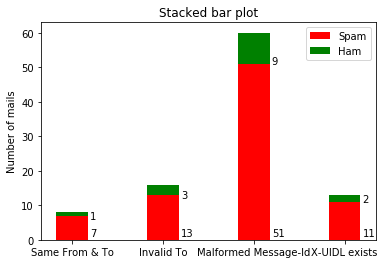

In [33]:
p1 = plt.bar(x_data,y_data[0],color='r',align='center',label=['f1','f2','f3','f4'], width=0.35)
p2 = plt.bar(x_data,y_data[1],color='g',bottom=y_data[0],align='center',label=['f1','f2','f3','f4'], width=0.35)
plt.ylabel('Number of mails')
plt.title('Stacked bar plot')
plt.xticks(x_data, ('Same From & To','Invalid To','Malformed Message-Id','X-UIDL exists'))
plt.yticks(np.arange(0,61,10))
plt.legend((p1[0],p2[0]),('Spam','Ham'),loc = 'upper right')
plt.text(1.20,1,spam_feature1)
plt.text(1.20,6,ham_feature1)
plt.text(2.20,1,spam_feature2)
plt.text(2.20,12,ham_feature2)
plt.text(3.20,1,spam_feature3)
plt.text(3.20,51,ham_feature3)
plt.text(4.20,1,spam_feature4)
plt.text(4.20,11,ham_feature4)
plt.show()